In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/dataset_rumah.zip') as f:
  f.extractall('dataset_rumah')

In [3]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import splitfolders

input_folder = '/content/dataset_rumah/dataset_rumah' 
splitfolders.ratio(input_folder, output='kelayakan',
                   seed=20, ratio=(.8, 0.2),
                   group_prefix=None)

Copying files: 1294 files [00:00, 3359.36 files/s]


In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 256)      0

In [14]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# New Section

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescaling images
train_datagen = ImageDataGenerator(rescale=1/255,
                                   zoom_range=0.3,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   rotation_range=60)
validation_datagen = ImageDataGenerator(rescale=1/255,
                                   zoom_range=0.3,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   rotation_range=60)

train_generator = train_datagen.flow_from_directory(
    '/content/kelayakan/train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/kelayakan/val',
    target_size=(100, 100),
    batch_size=8,
    class_mode='binary'
)

Found 1034 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [15]:
# Training data

history = model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=20,
    verbose=1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/20
16/16 [==============================] - 33s 2s/step - loss: 7.2052 - accuracy: 0.5078 - val_loss: 6.1950 - val_accuracy: 0.5938
Epoch 2/20
16/16 [==============================] - 29s 2s/step - loss: 7.8927 - accuracy: 0.4824 - val_loss: 7.3863 - val_accuracy: 0.5156
Epoch 3/20
16/16 [==============================] - 29s 2s/step - loss: 7.5313 - accuracy: 0.5061 - val_loss: 8.1012 - val_accuracy: 0.4688
Epoch 4/20
16/16 [==============================] - 30s 2s/step - loss: 7.5055 - accuracy: 0.5078 - val_loss: 8.3394 - val_accuracy: 0.4531
Epoch 5/20
16/16 [==============================] - 30s 2s/step - loss: 7.7735 - accuracy: 0.4902 - val_loss: 6.9098 - val_accuracy: 0.5469
Epoch 6/20
16/16 [==============================] - 29s 2s/step - loss: 7.7438 - accuracy: 0.4922 - val_loss: 8.5777 - val_accuracy: 0.4375
Epoch 7/20
16/16 [==============================] - 28s 2s/step - loss: 7.3445 - accuracy: 0.5184 - val_loss: 8.8160 - val_accuracy: 0.4219
Epoch 8/20
16/16 [==

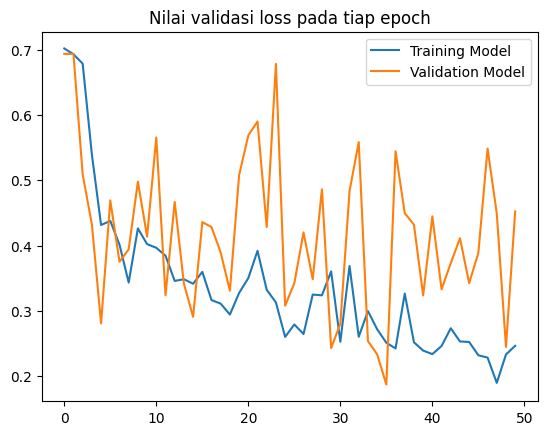

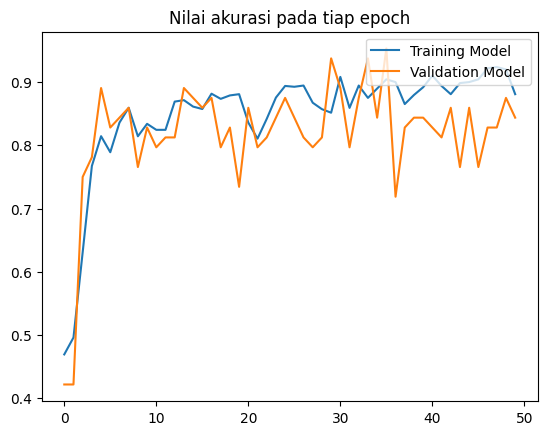

In [12]:
#Plot Training
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Model', 'Validation Model'], loc='upper right')
plt.title('Nilai validasi loss pada tiap epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Model', 'Validation Model'], loc='upper right')
plt.title('Nilai akurasi pada tiap epoch')
plt.show()

In [14]:
#Test the model

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(100, 100, 3))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.3:
    print(fn + " is a layak menerima bantuan")
  else:
    print(fn + " is a tidak layak menerima bantuan")

Saving   (1).jpg to   (1).jpg
1/1 [==============================] - 0s 39ms/step
[0.97614735]
  (1).jpg is a layak menerima bantuan


In [18]:
# save_model
export_dir = 'saved_model/model2'

model.save('saved_model/model1.h5')

tf.saved_model.save(model, export_dir)

In [16]:
# Select mode of optimization
mode = "a" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [17]:
# save_model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model

tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)